# Getting started with NumPy
Introduction to NumPy's most useful and most frequently used functions.

## Import packages

In [1]:
%run "import_packages.ipynb"

### Package versions

In [2]:
np.__version__
pd.__version__

'1.4.4'

In [3]:
print(np.__version__)
print(pd.__version__)

1.23.2
1.4.4


## Creating NumPy arrays from Python lists - `np.array()`

In [ ]:
a = np.array([2, 4, 7, 3, 1])
a

array([2, 4, 7, 3, 1])

In [8]:
b = np.array([1.2, 3, 4, 5.6, 2.1])
b

array([1.2, 3. , 4. , 5.6, 2.1])

## Types of NumPy arrays and their elements

#### `numpy.ndarray`

In [10]:
type(a)

numpy.ndarray

In [12]:
type(b)

numpy.ndarray

#### `dtype`
Frequently used `dtype`s: `int`, `int16`, `int32`, `int64`, `float`, `float16`, `float32`, `float64`...

In [13]:
c = np.array([1, 2, 3], dtype='float32')
c

array([1., 2., 3.], dtype=float32)

In [17]:
d = np.array([1., 2, 3.8, 4], dtype='int32')
d

array([1, 2, 3, 4])

## Creating NumPy arrays from scratch

### `np.arange()`, `np.zeros()`, `np.ones()`, `np.full()`, `np.linspace()`, `np.empty()`

In [20]:
a = np.arange(1, 10, 2)
a

array([1, 3, 5, 7, 9])

In [19]:
a = np.arange(1, 10, 2, dtype='float32')
a

array([1., 3., 5., 7., 9.], dtype=float32)

In [21]:
a = np.zeros(3)
a

array([0., 0., 0.])

In [22]:
a = np.zeros(3, dtype='int')
a

array([0, 0, 0])

In [24]:
a = np.ones(3, dtype='float')
a

array([1., 1., 1.])

In [25]:
a = np.full(3, 2.4)
a

array([2.4, 2.4, 2.4])

In [29]:
a = np.linspace(3, 11, 6)
a

array([ 3. ,  4.6,  6.2,  7.8,  9.4, 11. ])

In [28]:
a = np.linspace(3, 11, 7)
a

array([ 3.        ,  4.33333333,  5.66666667,  7.        ,  8.33333333,
        9.66666667, 11.        ])

In [30]:
a = np.empty(3)
a

array([2.4, 2.4, 2.4])

### `np.random.random()`, `np.random.randint()`, `np.random.normal()`, `np.random.seed()`

[0.28382835 0.60608318 0.94422514 0.85273554 0.00225923 0.52122603
 0.55203763 0.48537741 0.76813415 0.16071675]


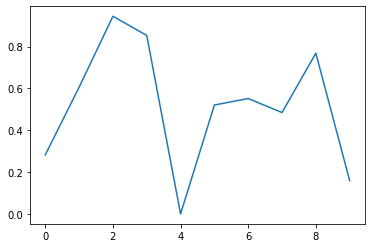

In [44]:
a = np.random.random((10,))
print(a)
plt.plot(a);

[0.15416284 0.7400497  0.26331502 0.53373939 0.01457496 0.91874701
 0.90071485 0.03342143 0.95694934 0.13720932]


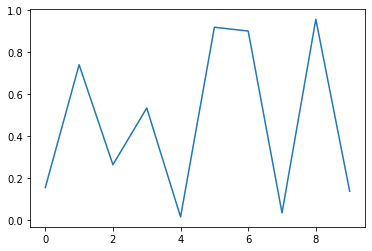

In [43]:
np.random.seed(12)
a = np.random.random((10,))
print(a)
plt.plot(a);

## Multidimensional NumPy arrays

### `np.array()`, `np.zeros()`, `np.ones()`, `np.full()`, `np.eye()`
The shape info is the necessary first argument for `np.zeros()`, `np.ones()` and `np.full()` and must be provided as a tuple.


In [12]:
a = np.array([range(i, i + 3) for i in [2, 5, 8]])
a

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

In [14]:
a = np.ones((3, 4), dtype='float32')
a

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

In [19]:
a = np.full((2, 4), 2.2)
a

array([[2.2, 2.2, 2.2, 2.2],
       [2.2, 2.2, 2.2, 2.2]])

In [17]:
a = np.eye(3)
a

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### `np.random.random()`, `np.random.randint()`, `np.random.normal()`, `np.random.seed()`
The shape info is the necessary last argument for `np.random.random()`, `np.random.randint()` and `np.random.normal()` and must be provided as a tuple. The first two arguments of `np.random.randint()` (`m` and `n`) represent the interval `[m, n)`. The first two arguments of `np.random.normal()` represent the mean and standard deviation.

In [37]:
np.random.seed(11)

In [22]:
a = np.random.random((2, 3))
a

array([[0.8110375 , 0.48295997, 0.90574346],
       [0.10980821, 0.29578924, 0.77636587]])

In [32]:
a = np.random.randint(1, 10, (3, 4))
a

array([[2, 8, 7, 6],
       [4, 6, 3, 3],
       [5, 8, 7, 1]])

In [35]:
a = np.random.normal(0, 1, (3, 4))
a

array([[ 0.17812766, -0.69390506, -1.20340942, -0.27918027],
       [-0.22218043, -0.40294963, -1.48402729, -1.29681002],
       [ 0.61225033,  0.40255853, -0.07589061, -1.1521492 ]])

## Controlling the number of fraction digits - `np.set_printoptions()`

In [36]:
# np.set_printoptions(precision=2)                                 # does not print trailing 0's
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
a

array([[ 0.18, -0.69, -1.20, -0.28],
       [-0.22, -0.40, -1.48, -1.30],
       [ 0.61,  0.40, -0.08, -1.15]])

## Attributes of NumPy arrays - `shape`, `ndim`, `size`, `dtype`

In [43]:
np.random.seed(12)
x1 = np.random.randint(5, size=6)
x2 = np.random.randint(5, size=(3, 4))
x3 = np.random.randint(5, size=(3, 4, 5))

In [49]:
print(x2.ndim)
print(x3.ndim)
print(x1.shape)
print(x2.shape)
print(x2.size)
print(x3.dtype)

2
3
(6,)
(3, 4)
12
int32


## Array indexing

In [62]:
print(x1)
print(x1[0])
print(x1[-1])
print(x1[-3])

print(x2)
print(x2[1])         # access a row
print(x2[1, :])      # access a row
print(x2[:, 1])      # access a column
print(x2[0, -1])
print(x2)

x2[2, 3] = 23
print(x2)

[3 3 1 2 3 3]
3
3
2
[[ 4  0  1  4]
 [ 1  2  3  2]
 [ 0  0  4 23]]
[1 2 3 2]
[1 2 3 2]
[0 2 0]
4
[[ 4  0  1  4]
 [ 1  2  3  2]
 [ 0  0  4 23]]
[[ 4  0  1  4]
 [ 1  2  3  2]
 [ 0  0  4 23]]


## Slicing
General syntax: `x[start:stop:step]`.

In [70]:
print(x2[1:, 0:2])
print(x2[1:, ::2])
print(x2[:-2, 1:])

print(x1)
print(x1[::-1])     # print x1 in reversed order

[[1 2]
 [0 0]]
[[1 3]
 [0 4]]
[[0 1 4]]
[3 3 1 2 3 3]
[3 3 2 1 3 3]


## Copying arrays - `copy()`
Subarrays are no-copy *views* on arrays. To create copies, use `copy()`.

In [74]:
print(x2)
x2_subarray = x2[0:2, 0:2]           # it's just a specific view, not a copy
print(x2_subarray)
x2_subarray[0, 0] = 22
print(x2_subarray)
print(x2)
x2_subarray = x2[0:2, 0:2].copy()    # it's a copy
x2_subarray[0, 0] = 33
print(x2_subarray)
print(x2)

[[22  0  1  4]
 [ 1  2  3  2]
 [ 0  0  4 23]]
[[22  0]
 [ 1  2]]
[[22  0]
 [ 1  2]]
[[22  0  1  4]
 [ 1  2  3  2]
 [ 0  0  4 23]]
[[33  0]
 [ 1  2]]
[[22  0  1  4]
 [ 1  2  3  2]
 [ 0  0  4 23]]


## Reshaping arrays - `reshape()` and `np.newaxis`

In [76]:
a = np.arange(1, 10).reshape((3, 3))
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [81]:
a = np.arange(1, 4)
print(a)
print(a.reshape((1, 3)))       # row vector via reshape
print(a[np.newaxis, :])        # row vector via newaxis
print(a.reshape((3, 1)))       # column vector via reshape
print(a[:, np.newaxis])        # column vector via newaxis

[1 2 3]
[[1 2 3]]
[[1 2 3]]
[[1]
 [2]
 [3]]
[[1]
 [2]
 [3]]


## Concatenating arrays - `np.concatenate()`, `np.vstack()`, `np.hstack()`

One-dimensional arrays:

In [88]:
a = np.array([1, 2, 3])
b = np.arange(4, 7)
c = np.concatenate([a, b])     # argument is a list
c

array([1, 2, 3, 4, 5, 6])

In [89]:
c = np.arange(7, 10)
d = np.concatenate([a, b, c])
d

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Two-dimensional arrays:

In [93]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])
b = np.concatenate([a, a])
b

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [95]:
b = np.concatenate([a, a], axis=1)
b

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [100]:
a = np.array([[1, 2, 3], 
              [4, 5, 6]])
b = np.array([7, 8, 9])
c = np.array([[10],
              [11]])
print(np.vstack([a, b]))
print(np.hstack([a, c]))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 1  2  3 10]
 [ 4  5  6 11]]


## Splitting arrays - `np.split()`, `np.vsplit()`, `np.hsplit()`

In [101]:
a = np.array([1, 2, 3, 4, 5, 6])
print(np.split(a, [3, 5]))

[array([1, 2, 3]), array([4, 5]), array([6])]


In [113]:
a = np.array(range(25)).reshape((5, 5))
print(a)
print()
a1, a2, a3 = np.hsplit(a, [2, 4])
print(a1, '\n', a2, '\n', a3)
print()
a1, a2, a3 = np.vsplit(a, [2, 4])
print(a1, '\n', a2, '\n', a3)
print()

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

[[ 0  1]
 [ 5  6]
 [10 11]
 [15 16]
 [20 21]] 
 [[ 2  3]
 [ 7  8]
 [12 13]
 [17 18]
 [22 23]] 
 [[ 4]
 [ 9]
 [14]
 [19]
 [24]]

[[0 1 2 3 4]
 [5 6 7 8 9]] 
 [[10 11 12 13 14]
 [15 16 17 18 19]] 
 [[20 21 22 23 24]]



## Universal functions (UFuncs) - vectorized operations, vector/array arithmetic

### Operations between scalars and arrays

In [115]:
a = np.arange(2, 5)
print(a)
print(a + 3)

[2 3 4]
[5 6 7]


In [121]:
np.random.seed(0)
a = np.random.randint(1, 10, (3, 3))
print(a)
print(a + 3)
print(a + a / 2)

[[6 1 4]
 [4 8 4]
 [6 3 5]]
[[ 9  4  7]
 [ 7 11  7]
 [ 9  6  8]]
[[ 9.00  1.50  6.00]
 [ 6.00  12.00  6.00]
 [ 9.00  4.50  7.50]]


### `np.abs()`, `np.exp()`, `np.exp2()`, `np.exp10()`, `np.log()`, `np.log2()`, `np.log10()`,...

In [128]:
np.random.seed(8)
a = np.random.randint(-5, 5, (2, 5))
print(a)
print(np.abs(a))
print(np.exp(a))
print(np.exp2(a))
print(np.log10(a))

[[-2 -1 -4  4  0]
 [ 3 -2  3 -5  0]]
[[2 1 4 4 0]
 [3 2 3 5 0]]
[[ 0.14  0.37  0.02  54.60  1.00]
 [ 20.09  0.14  20.09  0.01  1.00]]
[[ 0.25  0.50  0.06  16.00  1.00]
 [ 8.00  0.25  8.00  0.03  1.00]]
[[ nan  nan  nan  0.60 -inf]
 [ 0.48  nan  0.48  nan -inf]]


C:\Users\Vladan\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
C:\Users\Vladan\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


### `reduce()`
Works with any binary ufunc.

In [131]:
a = np.arange(1, 6)
print(np.add.reduce(a))        # return sum of all elements of a
print(np.multiply.reduce(a))   # return product of all elements of a

15
120


### `accumulate()`
Works with any binary ufunc.

In [132]:
a = np.arange(1, 6)
print(np.add.accumulate(a))          # return all intermediary results when summing elements of a left to right
print(np.multiply.accumulate(a))     # return all intermediary results when multiplying elements of a left to right

[ 1  3  6 10 15]
[  1   2   6  24 120]


### `outer()`
Works with any ufunc. Computes the output of all pairs of two different inputs.

In [134]:
a = np.arange(1, 6)
print(np.multiply.outer(a, a))       # create multiplication table

[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]


## Aggregation functions

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

### `np.sum()`, `np.min()`, `np.max()`

In [147]:
np.random.seed(2)

a = np.random.random(100)
print(np.sum(a))
print(np.min(a))
print(np.max(a))
print()

m = np.random.random((3, 4))
print(m)
print()
print(np.sum(m))
print(np.min(m, axis=0))         # axix=0: finding min of each column, i.e. ROWS (dimension 0) get COLLAPSED
print(np.max(m, axis=1))         # axix=1: finding min of each row, i.e. COLUMNS (dimension 1) get COLLAPSED

46.002824535219375
0.01301733669455063
0.9938520114212729

[[ 0.78  0.13  0.87  0.75]
 [ 0.80  0.54  0.22  0.92]
 [ 0.59  0.35  0.26  0.91]]

7.126900812589812
[ 0.59  0.13  0.22  0.75]
[ 0.87  0.92  0.91]


### `np.mean()`, `np.median()`, `np.percentile()`

In [154]:
np.random.seed(2)

a = np.random.random(100)
print(np.mean(a))
print(np.median(a))
print(np.percentile(a, 75))     # 3rd quartile
print(np.percentile(a, 95))     # 95th percentile

0.4600282453521938
0.4363710825844014
0.6412655274482348
0.9542826696020861


## Broadcasting

### Rules of broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the *shape* of the one with fewer dimensions is *padded* with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

To make these rules clear, let's consider a few examples in detail.

![Broadcasting Visual](figures/broadcasting.png)

### Examples of broadcasting

In [155]:
M = np.ones((2, 3))
a = np.arange(3)
M.shape, a.shape

((2, 3), (3,))

In [156]:
M + a           # a.shape first becomes (1, 3) by Rule 1, 
                # and then by Rule 2 it stretches vertically to match the number of rows of M (2)

array([[ 1.00,  2.00,  3.00],
       [ 1.00,  2.00,  3.00]])

In [157]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
a.shape, b.shape

((3, 1), (3,))

In [158]:
a + b          # b.shape first becomes (1, 3) by Rule 1, 
               # then by Rule 2 it stretches vertically to match the number of rows of a (3), 
               # and then, also by Rule 2, a stretches horizontally to match the number of columns of b (3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [159]:
M = np.ones((3, 2))
a = np.arange(3)
M.shape, a.shape

((3, 2), (3,))

In [160]:
M + a          # a.shape first becomes (1, 3) by Rule 1, 
               # then by Rule 2 it stretches vertically to match the number of rows of M (3), 
               # but then M.shape is (3, 2) and a.shape is (3, 3), and by Rule 3 an error is raised

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

## Comparison operators as ufuncs - Boolean arrays

### Using relational and logical operators
Logical operators: `&` - and; `|` - or; `^` - xor; `~` - not.

In [181]:
a = np.array([1, 2, 3, 4, 5])
print(a > 3)
print(np.sum(a > 3))                       # use np.sum() instead of just sum(),
print(sum(a > 3))                          # although sum() works as well
print((a ** 2) == (2 ** a))

[False False False  True  True]
2
2
[False  True False  True False]


In [179]:
rng = np.random.RandomState(23)
np.random.seed(2)
a = np.random.randint(10, size=(3, 4))
print(a)
print(a > 3)
print()

# Make sure to use np.sum() instead of just sum() with multidimensional arrays!

print(np.sum(a > 3))                       # sums of True's in the array
print(np.sum(a > 3, axis=0))               # sums of True's in each column (axis=0: rows get collapsed)
print(np.sum(a == 8, axis=1))              # sums of True's in each row (axis=1: columns get collapsed)
print(np.sum((a > 3) & ((a % 2) == 0)))    # logical operators: & - and; | - or; ^ - xor; ~ - not

[[8 8 6 2]
 [8 7 2 1]
 [5 4 4 5]]
[[ True  True  True False]
 [ True  True False False]
 [ True  True  True  True]]
9
[3 3 2 1]
[2 1 0]
6


### `np.any()` and `np.all()`

In [187]:
rng = np.random.RandomState(23)
np.random.seed(2)
a = np.random.randint(10, size=(3, 4))
print(a)
print(np.any(a > 3))
print(np.any(a < 1))
print(np.all(a > 0))
print(np.all(a < 5))
print(np.all(a > 1, axis=0))               # test if all elements in each column are > 1 (axis=0: rows get collapsed)
print(np.all(a > 1, axis=1))               # test if all elements in each row are > 1 (axis=1: columns get collapsed)

[[8 8 6 2]
 [8 7 2 1]
 [5 4 4 5]]
True
False
True
False
[ True  True  True False]
[ True False  True]


## Introducing The Beatles dataset

Read The Beatles songs *csv* file and use Pandas to extract song lengths as a NumPy array.

In [202]:
songs = pd.read_csv('data/The Beatles songs dataset, v1, no NAs.csv')       # get the songs as a pd.DataFrame object
print(songs.columns)                                                        # get the columns as a pd.Index object
print(list(songs.columns))                                                  # get the columns as a list
print()

lengths = songs['Duration']                                                 # get the song lengths as a pd.Series object
print(lengths.head())
print()

times = lengths.values                                                      # convert the song lengths into a NumPy array
print(type(times))
print(times.shape)

Index(['Title', 'Year', 'Album.debut', 'Duration', 'Other.releases', 'Genre',
       'Songwriter', 'Lead.vocal', 'Top.50.Billboard'],
      dtype='object')
['Title', 'Year', 'Album.debut', 'Duration', 'Other.releases', 'Genre', 'Songwriter', 'Lead.vocal', 'Top.50.Billboard']

0    174
1    335
2    152
3    104
4    163
Name: Duration, dtype: int64

<class 'numpy.ndarray'>
(310,)


Plot the song lengths.

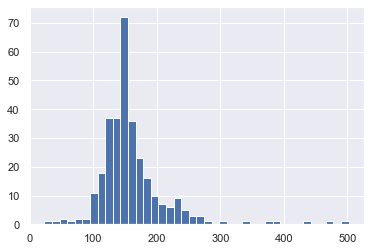

In [208]:
sb.set()                         # set plot styles
plt.hist(times, 40);             # x: song time in [sec]; y: number of songs; 40 bins

## Masking - Boolean arrays as masks

Extract song release years into another NumPy array.

In [222]:
years = songs['Year'].values
print(len(years))
print(years[0:10])

310
[1965 1967 1964 1963 1963 1968 1965 1961 1963 1963]


In [230]:
years_gt_1968 = (years > 1968)                           # mask: Boolean array of the same length as years, True if years > 1968
print(years_gt_1968[20:30])                              # get a slice of it
print()

# Get the titles of the first 10 songs such that years > 1968
print(songs[years_gt_1968]['Title'].head(10))
print()

# Get the titles of the last 10 songs such that years > 1968 and times < 120
times_lt_120 = (times < 120)
print(songs[years_gt_1968 & times_lt_120]['Title'].tail(10))
print()

# Get the titles of all songs released 1966 or 1967, as well as the mean value of their lengths
years_1966_1967 = (years >= 1966) & (years <= 1967)
print(songs[years_1966_1967]['Title'])
print()
print('Mean length of songs from 1966-1967:', np.mean(songs[years_1966_1967]['Duration']))

[False False False False False False  True  True False False]

10             All Things Must Pass
26    Because I Know You Love Me So
27                          Because
36                Carry That Weight
44                  Come and Get It
45                    Come Together
52                       Dig a Pony
53                           Dig It
59                Don't Let Me Down
68        Fancy My Chances with You
Name: Title, dtype: object

36                           Carry That Weight
53                                      Dig It
81                             Golden Slumbers
94                                 Her Majesty
173                                 Maggie Mae
175            Mailman, Bring Me No More Blues
179                           Mean Mr. Mustard
208                              Polythene Pam
226    She Came in Through the Bathroom Window
Name: Title, dtype: object

1                                    A Day in the Life
11                                    All T

## Fancy indexing
Fancy indexing is like the simple indexing, but arrays of indices are passed in place of single scalars. <br>
**Important:** The shape of the result is the same as the (possibly broadcasted) shape of the index array, not of the array being indexed.

### Fancy indexing of one-dimensional arrays

In [265]:
rng = np.random.RandomState(23)
np.random.seed(3)
a = np.random.randint(10, size=10)
print(a)
print()

i = [2, 8, 5]                                 # one-dimensional index
print(a[i])
a[i] = 55
print(a)
a[i] -= 10
print(a)
print()

i = np.array([[1, 0],                         # multi-dimensional index
              [2, 4]])
print(a[i])                                   # the shape of the result is the same as the shape of the index array

[8 9 3 8 8 0 5 3 9 9]
[[5 7 6 0]
 [4 7 8 1]
 [6 2 2 1]]

[3 9 0]
[ 8  9 55  8  8 55  5  3 55  9]
[ 8  9 45  8  8 45  5  3 45  9]

[[ 9  8]
 [45  8]]


### Fancy indexing of multi-dimensional arrays

In [266]:
m = np.random.randint(10, size=(3, 4))
print(m)
print()

i_row = np.array([0, 2, 1])
i_col = np.array([2, 1, 0])
print(m[i_row, i_col])                        # resulting pairs of indices: [0, 2], [2, 1], [1, 0]
print()

print(m[i_row[:, np.newaxis], i_col])
print()

print(m[2, [2, 0, 1]])
print(m[-2:, [2, 0, 1]])

[[3 5 8 1]
 [8 7 8 1]
 [0 5 4 1]]

[8 5 8]

[[8 5 3]
 [4 5 0]
 [8 7 8]]

[4 0 5]
[[8 8 7]
 [4 0 5]]


### Combining fancy indexing and masking

In [267]:
mask = np.array([1, 0, 1, 0], dtype=bool)
print(i_row[:, np.newaxis])
print(m[i_row[:, np.newaxis], mask])

[[0]
 [2]
 [1]]
[[3 8]
 [0 4]
 [8 8]]


## Sorting NumPy arrays

### `np.sort()`

In [273]:
a = np.array([3, 1, 7, 2, 5])
print(a)
print(np.sort(a))                  # a does not change
a.sort()                           # inplace sorting, a changes
print(a)

[3 1 7 2 5]
[1 2 3 5 7]
[1 2 3 5 7]


In [285]:
np.random.seed(0)
m = np.random.randint(10, size=(4, 6))
print(m)
print()

print(np.sort(m, axis=0))                 # sort each column of x, independently 
print()
print(np.sort(m, axis=1))                 # sort each row of x, independently 

[[5 0 3 3 7 9]
 [3 5 2 4 7 6]
 [8 8 1 6 7 7]
 [8 1 5 9 8 9]]

[[3 0 1 3 7 6]
 [5 1 2 4 7 7]
 [8 5 3 6 7 9]
 [8 8 5 9 8 9]]

[[0 3 3 5 7 9]
 [2 3 4 5 6 7]
 [1 6 7 7 8 8]
 [1 5 8 8 9 9]]


### `np.argsort()`

In [282]:
songs = pd.read_csv('data/The Beatles songs dataset, v1, no NAs.csv')       # get the songs as a pd.DataFrame object
lengths = songs['Duration']                                                 # get the song lengths as a pd.Series object
print(lengths.head())
print()

times = lengths.values                                                      # convert the song lengths into a NumPy array
i = np.argsort(times)                                                       # sort song times from shortest to longest
print(i[0:10])                                                              # print the first 10 indices
print(times[i[0:10]])                                                       # print the 10 shortest song times
print()

print(songs['Title'][i])                                                    # fancy-index songs['Title']
print()

print(songs['Title'][i[-10:]])                                              # fancy-index songs['Title'], the 10 longest songs

0    174
1    335
2    152
3    104
4    163
Name: Duration, dtype: int64

[ 94 173  53 288 179 208 223  81 132  36]
[23 40 51 52 66 72 80 91 92 96]

94                     Her Majesty
173                     Maggie Mae
53                          Dig It
288                 Wild Honey Pie
179               Mean Mr. Mustard
                  ...             
283       What's The New Mary Jane
146              It's All Too Much
98                        Hey Jude
120    I Want You (She's So Heavy)
212                   Revolution 9
Name: Title, Length: 310, dtype: object

93                   Helter Skelter
104                 I Am the Walrus
286    While My Guitar Gently Weeps
291          Within You Without You
1                 A Day in the Life
283        What's The New Mary Jane
146               It's All Too Much
98                         Hey Jude
120     I Want You (She's So Heavy)
212                    Revolution 9
Name: Title, dtype: object


### `np.partition()`
Takes a NumPy array and a number (*k*) and returns *k* smallest first (in arbitrary order) and then the remaining ones (also in arbitrary order).

In [286]:
a = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(a, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [287]:
np.random.seed(0)
m = np.random.randint(10, size=(4, 6))
print(m)
print()

print(np.partition(m, 2, axis=0))                 # partition each column of x, independently, k = 2
print()
print(np.partition(m, 2, axis=1))                 # partition each row of x, independently, k = 2

[[5 0 3 3 7 9]
 [3 5 2 4 7 6]
 [8 8 1 6 7 7]
 [8 1 5 9 8 9]]

[[3 0 1 3 7 6]
 [5 1 2 4 7 7]
 [8 5 3 6 7 9]
 [8 8 5 9 8 9]]

[[0 3 3 5 7 9]
 [2 3 4 5 7 6]
 [1 6 7 8 8 7]
 [1 5 8 9 8 9]]
